Docker image information: https://github.com/GitData-GA/FireScape/tree/jupyter

# Import necessary libraries

In [1]:
import zipfile
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example: Import LA tree data

Please make sure you put all the data in the folder `working/data/`.

## Get the data and unzip it

In [2]:
# Save the paths for later
zip_path = '/app/working/data/la_tree.zip'
extract_to = '/app/working/data/la_tree'

In [3]:
os.makedirs(extract_to, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Delete the original zip file
os.remove(zip_path)

# Save the csv path for later
la_tree_street = extract_to + '/la_tree_street.csv'
la_tree_park = extract_to + '/la_tree_park.csv'

## Read the data using `pandas`

In [4]:
la_tree_street_df = pd.read_csv(la_tree_street)
la_tree_park_df = pd.read_csv(la_tree_park)

print(la_tree_street_df.head())
print(la_tree_park_df.head())

    Latitude   Longitude                                      Species   DBH
0  34.057989 -118.316354  velvet ash; Arizona ash (Fraxinus velutina)  17.0
1  34.057987 -118.316122                  ash species (Fraxinus spp.)  21.0
2  34.057984 -118.316252                  ash species (Fraxinus spp.)  21.0
3  34.057924 -118.316600             majesty palm (Ravenea rivularis)   7.0
4  34.057840 -118.316591           queen palm (Syagrus romanzoffiana)  11.0
    Latitude   Longitude                                   Species  Diameter  \
0  34.040379 -118.242485      Indian laurel fig (Ficus microcarpa)      20.0   
1  34.040320 -118.242379      Indian laurel fig (Ficus microcarpa)      22.0   
2  34.040205 -118.242635   African fern pine (Afrocarpus falcatus)       5.0   
3  34.040299 -118.242609  London plane tree (Platanus x hispanica)      16.0   
4  34.040344 -118.242567  London plane tree (Platanus x hispanica)      16.0   

   Any_Protected  
0          False  
1          False  
2     

## Plot coordinates with `matplotlib` and `numpy`

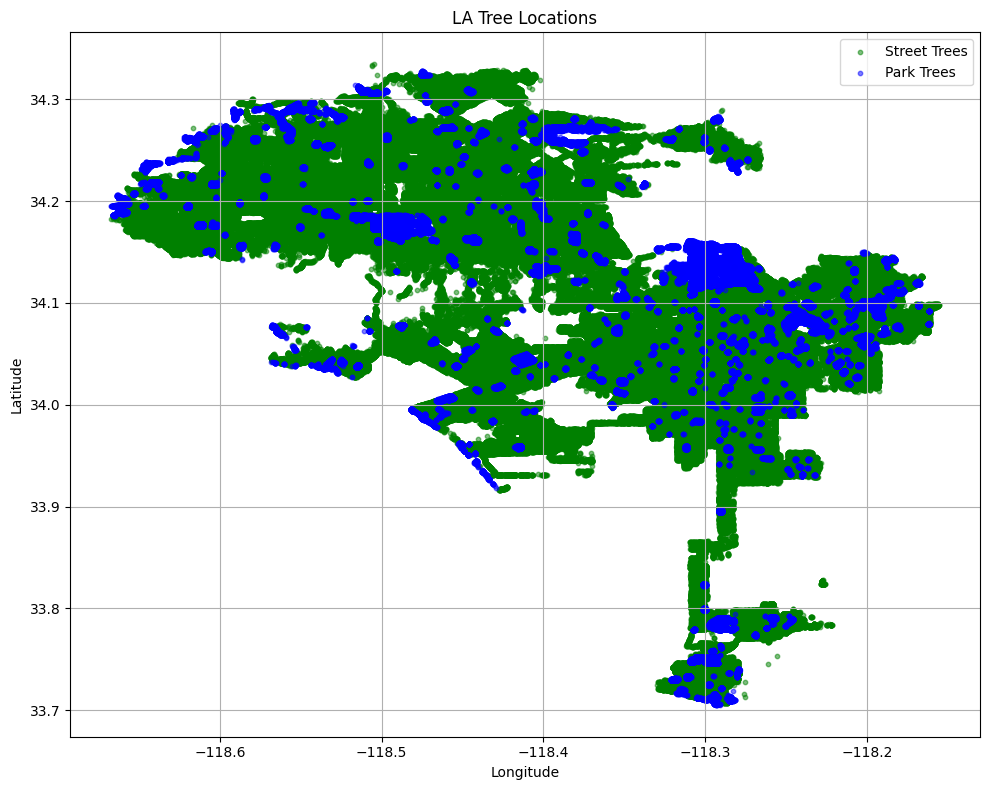

In [5]:
# Extract coordinates using NumPy
street_coords = la_tree_street_df[['Longitude', 'Latitude']].to_numpy()
park_coords = la_tree_park_df[['Longitude', 'Latitude']].to_numpy()

# Plot with matplotlib
plt.figure(figsize=(10, 8))
plt.scatter(street_coords[:, 0], street_coords[:, 1], c='green', alpha=0.5, label='Street Trees', s=10)
plt.scatter(park_coords[:, 0], park_coords[:, 1], c='blue', alpha=0.5, label='Park Trees', s=10)

plt.title('LA Tree Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()